***Data description***: https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data?select=data_description.txt

1. Import libraries

In [3]:
import pandas as pd  # import pandas library
from sklearn.model_selection import train_test_split  # import train_test_split function
from sklearn.impute import SimpleImputer  # import SimpleImputer class for handling missing values
from sklearn.tree import DecisionTreeClassifier  # import DecisionTreeClassifier for classification
from sklearn.metrics import accuracy_score  # import accuracy_score for evaluating model performance
from sklearn.pipeline import make_pipeline  # import make_pipeline for creating a pipeline of processing steps
from sklearn.preprocessing import OneHotEncoder  # import OneHotEncoder for one-hot encoding categorical variables
from sklearn.compose import make_column_transformer  # import make_column_transformer for creating a column transformer
from sklearn.preprocessing import StandardScaler  # import StandardScaler for scaling numerical features
from sklearn.model_selection import GridSearchCV  # import GridSearchCV for hyperparameter tuning
import multiprocessing  # import multiprocessing for parallel processing
from sklearn.tree import DecisionTreeRegressor  # import DecisionTreeRegressor for regression
from sklearn.linear_model import LinearRegression, SGDRegressor  # import LinearRegression and SGDRegressor for regression
import warnings  # import warnings to handle warnings
warnings.filterwarnings("ignore")  # ignore warnings
import seaborn as sns  # import seaborn for data visualization
import matplotlib.pyplot as plt  # import matplotlib for plotting
from sklearn.preprocessing import OrdinalEncoder  # import OrdinalEncoder for ordinal encoding

2. Read de data

In [5]:
# define the URL of the Google Drive file
url = "https://drive.google.com/file/d/1zDfaMU9S_BuZWsiILeUu730GsbnLqmy6/view?usp=sharing"

# extract the file ID from the URL and construct the direct download URL
# Google Drive file URLs contain the file ID between the '/d/' and '/view' parts
path = 'https://drive.google.com/uc?export=download&id=' + url.split('/')[-2]

# use pandas to read the CSV file from the constructed download URL
data = pd.read_csv(path)

# display the first row of the dataframe to verify successful loading
data.head(1)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500


3. Set X and y

In [7]:
# check columns contained in data frame
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [9]:
# define the column name that should be excluded from analysis
column_to_exclude = 'Id'

# get a list of column names excluding the specified column
# 'data.columns.difference()' returns a new Index with elements from the original Index
# that are not in the passed sequence, effectively excluding 'column_to_exclude'
columns_for_analysis = data.columns.difference([column_to_exclude])

In [15]:
# create a copy of the dataframe containing only the columns needed for analysis
X_train = data[columns_for_analysis].copy()

# extract the target variable 'SalePrice' from the dataframe
# the 'pop' method removes the specified column from X_train and returns it
y_train = X_train.pop('SalePrice')

# we're not sepparating into train/test sets because, since this is for a Kaggle competition, 
# we're provided with the different sets from the beginning (except the y_test)

In [17]:
# select categorical and numerical column names
X_cat_columns = X_train.select_dtypes(exclude="number").columns
X_num_columns = X_train.select_dtypes(include="number").columns

# create numerical pipeline, only with the SimpleImputer()
numeric_pipe = make_pipeline(
    SimpleImputer())

# create categorical pipeline, with the SimpleImputer() and the OneHotEncoder
categoric_pipe = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="N_A"),
    OneHotEncoder(drop="first",sparse_output=False, handle_unknown='ignore') # ignore puts ceros in the columns, infrequent would place 1 on things that are infrequent
)

# initialize a DecisionTreeRegressor object.
dtree = DecisionTreeRegressor()

# initialize a StandardScaler object.
scaler = StandardScaler()

In [19]:
# create the ColumnTransformer
preprocessor = make_column_transformer(
    (numeric_pipe, X_num_columns),
    (categoric_pipe, X_cat_columns),
)

In [23]:
# Create a machine learning pipeline using make_pipeline
# The pipeline includes preprocessing, scaling, and a decision tree regressor
full_pipeline = make_pipeline(preprocessor, scaler, dtree).set_output(transform='pandas')

# Execute the pipeline
full_pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer())]),
                                                  Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea', 'GarageCars',
       'GarageYrBlt', 'GrLivArea'...
       'GarageFinish', 'GarageQual', 'GarageType', 'Heating', 'HeatingQC',
       'HouseStyle', 'KitchenQual', 'LandContour', 'LandSlope', 'LotConfig',
       'LotShape', 'MSZoning', 'MasVnrType', 'MiscFeature', 'Neighborhood',
       'PavedDrive', 'PoolQC', 'RoofMatl', 'RoofStyle', 'SaleCondition',
       'SaleType', 'Street', 'Utilities'],
      dtype='object'))])),
                ('standardscaler', StandardScaler()),
                ('decisiontreeregressor', DecisionTreeRegressor())])

In [25]:
param_grid = {
    # Parameters for the ColumnTransformer step named 'pipeline-1'
    'columntransformer__pipeline-1__simpleimputer__strategy': ['mean', 'median'],
    # Parameters for the StandardScaler step
    'standardscaler__with_mean': [True, False],
    'standardscaler__with_std': [True, False],
    # Parameters for the DecisionTreeRegressor step
    'decisiontreeregressor__max_depth': [5, 10, 15],
    'decisiontreeregressor__min_samples_split': [2, 4, 18],
    'decisiontreeregressor__min_samples_leaf': [2, 5, 10],
    'decisiontreeregressor__criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']
}

In [29]:
# for scoring parameters: https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

# perform grid search using GridSearchCV
search = GridSearchCV(
    full_pipeline,                         # pipeline to optimize
    param_grid,                            # parameter grid to search over
    cv=5,                                  # 5-fold cross-validation
    scoring='neg_mean_squared_log_error',  # scoring metric for evaluation
    verbose=1                              # print progress messages
)

In [31]:
search.fit(X_train, y_train)

Fitting 5 folds for each of 864 candidates, totalling 4320 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer())]),
                                                                         Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea', 'GarageCar...
                         'decisiontreeregressor__criterion': ['squared_error',
                                                              'friedman_mse',
                                                              'absolute_error',
                                                              'poisson'],
                         'decisiontreeregressor__max_depth': [5, 10, 15],
                         'decisiontreeregressor__min_samples_leaf': [2, 5, 10],
                         'decisiontreeregressor__min_samples_split': [2, 4, 18],
                         'standardscaler__with_mean': [True, False],
                         'standardscaler__with_std': [True, False]},
             scoring='neg_mean_squared_log_error', verbose=1)

In [33]:
search.best_params_

{'columntransformer__pipeline-1__simpleimputer__strategy': 'mean',
 'decisiontreeregressor__criterion': 'squared_error',
 'decisiontreeregressor__max_depth': 15,
 'decisiontreeregressor__min_samples_leaf': 10,
 'decisiontreeregressor__min_samples_split': 2,
 'standardscaler__with_mean': False,
 'standardscaler__with_std': False}

### Preparing the submissions file

Load test data

In [35]:
test_url = "https://drive.google.com/file/d/1VQwZIKEOwd20ycNYJmDYqLDLBYbMig9I/view?usp=sharing"
test_path = "https://drive.google.com/uc?export=download&id="+test_url.split('/')[-2]
test_data = pd.read_csv(test_path)

In [37]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


remove Id and keep it for later

In [39]:
Ids=test_data.pop('Id')

In [41]:
X_test = test_data

Do same steps as before (simpulating a pipeline) - not necessary to repeat steps for X_test sice everything is saved in search

In [44]:
y_test = search.predict(X_test)

concatenate the labels from before to the predicted value

In [46]:
to_save=pd.concat([Ids,pd.DataFrame(y_test)],axis=1)

Save to a CSV file.

In [48]:
to_save.rename(columns={0:'SalePrice'}).to_csv('submission_r.csv',index=False)

In [96]:
from IPython.display import display, FileLink

# Display the file download link
display(FileLink('./submission_r.csv'))

C:\Users\tello\Desktop\Formación\Data Science\2023\Bootcamp\7. Supervised Machine Learning\submission_r.csv

In [50]:
search.score(X_train, y_train)

-0.016792273424240004

In [52]:
dt_predictions = search.predict(X_test)

### 5.2.&nbsp;SGDRegressor

In [54]:
param_grid_sgd = {
    'columntransformer__pipeline-1__simpleimputer__strategy': ['mean', 'median'],
    'standardscaler__with_mean': [True, False],
    'standardscaler__with_std': [True, False],
    'sgdregressor__loss': ['squared_loss', 'huber', 'epsilon_insensitive'],
    'sgdregressor__penalty': ['l2', 'l1', 'elasticnet'],
    'sgdregressor__alpha': [0.0001, 0.001, 0.01],
    'sgdregressor__eta0': [0.01, 0.1, 0.2],
    'sgdregressor__max_iter': [100, 200],
    'sgdregressor__tol': [1e-3, 1e-4, 1e-5]
}

In [56]:
sgd_pipeline = make_pipeline(preprocessor,
                            scaler,
                            SGDRegressor())

In [58]:
# for scoring parameters: https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

sgd_pipeline = GridSearchCV(sgd_pipeline,
                      param_grid_sgd,
                      cv=5,
                      scoring='neg_mean_squared_log_error',
                      verbose=1)

In [60]:
sgd_pipeline.fit(X_train, y_train)

sgd_predictions = sgd_pipeline.predict(X_test)

Fitting 5 folds for each of 3888 candidates, totalling 19440 fits


Do same steps as before (simpulating a pipeline) - not necessary to repeat steps for X_test sice everything is saved in search

In [62]:
y_test_sgd = sgd_pipeline.predict(X_test)

concatenate the labels from before to the predicted value

In [64]:
to_save=pd.concat([Ids,pd.DataFrame(y_test_sgd)],axis=1)

Save to a CSV file.

In [66]:
to_save.rename(columns={0:'SalePrice'}).to_csv('submission_sgd.csv',index=False)

In [72]:
# Display the file download link
display(FileLink('./submission_sgd.csv'))

C:\Users\tello\Desktop\Formación\Data Science\2023\Bootcamp\7. Supervised Machine Learning\submission_sgd.csv

### 5.3.&nbsp;LinearRegression

In [74]:
param_grid_lr = {
    'columntransformer__pipeline-1__simpleimputer__strategy': ['mean', 'median'],
    'standardscaler__with_mean': [True, False],
    'standardscaler__with_std': [True, False],
    'linearregression__fit_intercept': [True, False]
}

In [76]:
lr_pipeline = make_pipeline(preprocessor,
                            scaler,
                            LinearRegression())

In [78]:
lr_pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer())]),
                                                  Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea', 'GarageCars',
       'GarageYrBlt', 'GrLivArea'...
       'GarageFinish', 'GarageQual', 'GarageType', 'Heating', 'HeatingQC',
       'HouseStyle', 'KitchenQual', 'LandContour', 'LandSlope', 'LotConfig',
       'LotShape', 'MSZoning', 'MasVnrType', 'MiscFeature', 'Neighborhood',
       'PavedDrive', 'PoolQC', 'RoofMatl', 'RoofStyle', 'SaleCondition',
       'SaleType', 'Street', 'Utilities'],
      dtype='object'))])),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [80]:
# for scoring parameters: https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

lr_search = GridSearchCV(lr_pipeline,
                      param_grid_lr,
                      cv=5,
                      scoring='neg_mean_squared_log_error',
                      verbose=1)

In [84]:
lr_search.fit(X_train, y_train)

lr_predictions = lr_search.predict(X_test)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


In [86]:
lr_search.best_params_

{'columntransformer__pipeline-1__simpleimputer__strategy': 'mean',
 'linearregression__fit_intercept': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True}

Do same steps as before (simpulating a pipeline) - not necessary to repeat steps for X_test sice everything is saved in search

In [88]:
y_test_lr = lr_search.predict(X_test)

concatenate the labels from before to the predicted value

In [90]:
to_save=pd.concat([Ids,pd.DataFrame(y_test_lr)],axis=1)

Save to a CSV file.

In [92]:
to_save.rename(columns={0:'SalePrice'}).to_csv('submission_lr.csv',index=False)

In [94]:
# Display the file download link
display(FileLink('./submission_lr.csv'))

C:\Users\tello\Desktop\Formación\Data Science\2023\Bootcamp\7. Supervised Machine Learning\submission_lr.csv

Comparing results

In [98]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

In [100]:
dt_mae = mean_absolute_error(y_true = y_test, y_pred = dt_predictions)
dt_rmse = mean_squared_error(y_true = y_test, y_pred = dt_predictions, squared=False)
dt_mape = mean_absolute_percentage_error(y_true = y_test, y_pred = dt_predictions)
dt_r2 = r2_score(y_true = y_test, y_pred = dt_predictions)

sgd_mae = mean_absolute_error(y_true = y_test, y_pred = sgd_predictions)
sgd_rmse = mean_squared_error(y_true = y_test, y_pred = sgd_predictions, squared=False)
sgd_mape = mean_absolute_percentage_error(y_true = y_test, y_pred = sgd_predictions)
sgd_r2 = r2_score(y_true = y_test, y_pred = sgd_predictions)


lr_mae = mean_absolute_error(y_true = y_test, y_pred = lr_predictions)
lr_rmse = mean_squared_error(y_true = y_test, y_pred = lr_predictions, squared=False)
lr_mape = mean_absolute_percentage_error(y_true = y_test, y_pred = lr_predictions)
lr_r2 = r2_score(y_true = y_test, y_pred = lr_predictions)

comparing_models_df = pd.DataFrame({"MAE": [dt_mae, sgd_mae, lr_mae],
                                    "RMSE": [dt_rmse, sgd_rmse, lr_rmse],
                                    "MAPE": [dt_mape, sgd_mape, lr_mape],
                                    "R2": [dt_r2, sgd_r2, lr_r2]},
                                    index=["decision_tree", "sgd", "linear_regression"])

comparing_models_df

,MAE,RMSE,MAPE,R2
decision_tree,0.000000,0.000000,0.000000,1.000000
sgd,32152.013714,44932.974122,0.176182,0.651063
linear_regression,23864.034987,37334.742415,0.138742,0.759097


### Iterpretation of the numbers:

- MAE - Mean Absolute Error: whether this is high or low depends on the context, it's scale dependant
- RMSE - Root Mean Squared Error: this one too is scale dependant. It penalizes more for large errors
- MAPE - Mean Absolute Percentage Error: this shows the % error, how far you're away from the actual value. If it is 0.15, it means that you are 15% away
- R2 - Coefficient of Determination: this is a measure of how well the model fits the data, the worst it can be is 0 and the best is 1, but it can also be negative

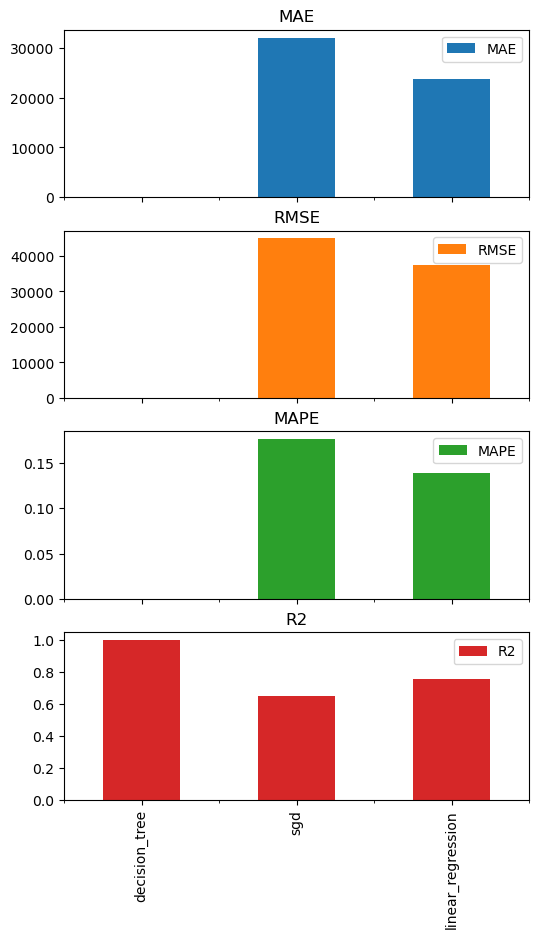

In [102]:
comparing_models_df.plot.bar(subplots=True,
                             figsize=(6, 10));

# Plots
## Histograms & Scatterplots

### Decision Tree

In [104]:
dt_errors_df = X_test.copy()
dt_errors_df["price"] = y_test
dt_errors_df["prediction"] = dt_predictions
dt_errors_df["error"] = dt_errors_df["prediction"] - dt_errors_df["price"]

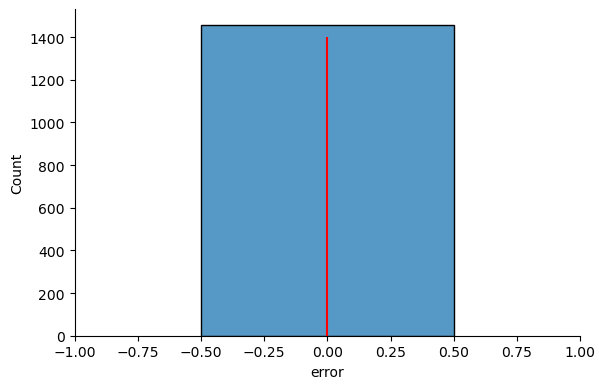

In [150]:
sns.displot(dt_errors_df['error'],
            aspect=1.5,
            height = 4)
plt.vlines(x=0,
           ymin=0,
           ymax=1400,
           color='red')
plt.xlim(-1,
         1)
plt.show();

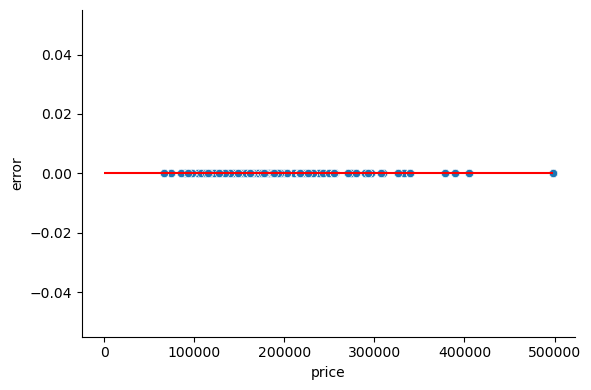

In [110]:
sns.relplot(data=dt_errors_df,
            x='price',
            y='error',
            aspect=1.5,
            height = 4)
plt.hlines(y=0,
           xmin=0,
           xmax=max(dt_errors_df['price']),
           color='red')
plt.show()

### SDG

In [108]:
sgd_errors_df = X_test.copy()
sgd_errors_df["price"] = y_test
sgd_errors_df["prediction"] = sgd_predictions
sgd_errors_df["error"] = sgd_errors_df["prediction"] - sgd_errors_df["price"]

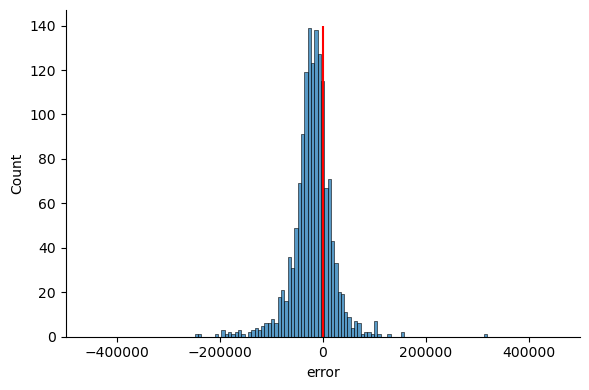

In [146]:
sns.displot(sgd_errors_df['error'],
            aspect=1.5,
            height = 4)
plt.vlines(x=0,
           ymin=0,
           ymax=140,
           color='red')
plt.xlim(-500000,
         500000)
plt.show();

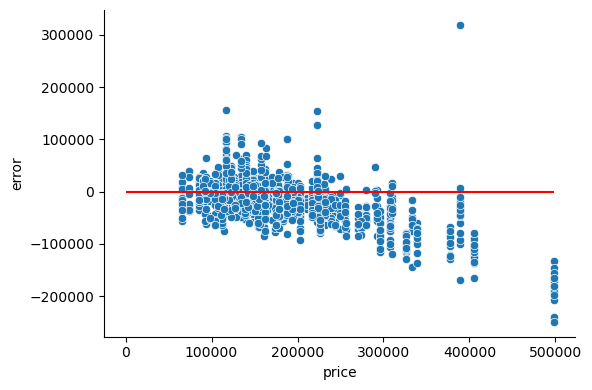

In [114]:
sns.relplot(data=sgd_errors_df,
            x='price',
            y='error',
            aspect=1.5,
            height = 4)
plt.hlines(y=0,
           xmin=0,
           xmax=max(sgd_errors_df['price']),
           color='red')
plt.show()

### LR

In [116]:
lr_errors_df = X_test.copy()
lr_errors_df["price"] = y_test
lr_errors_df["prediction"] = lr_predictions
lr_errors_df["error"] = lr_errors_df["prediction"] - lr_errors_df["price"]

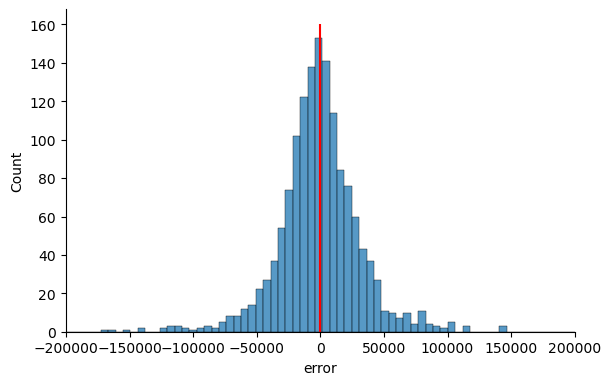

In [154]:
sns.displot(lr_errors_df['error'],
            aspect=1.5,
            height = 4)
plt.vlines(x=0,
           ymin=0,
           ymax=160,
           color='red')
plt.xlim(-200000,
         200000)
plt.show();

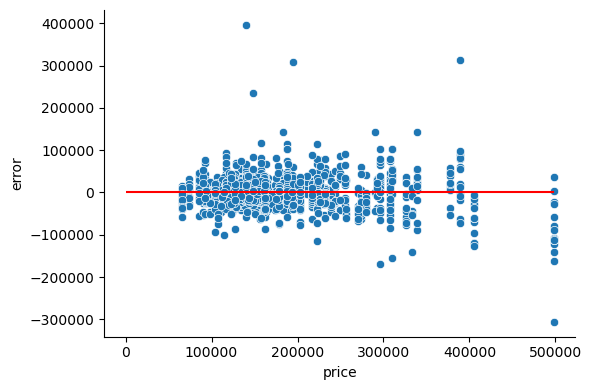

In [120]:
sns.relplot(data=lr_errors_df,
            x='price',
            y='error',
            aspect=1.5,
            height = 4)
plt.hlines(y=0,
           xmin=0,
           xmax=max(lr_errors_df['price']),
           color='red')
plt.show()